In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from vs30 import model, model_geology,sites_cluster

In [12]:
gid_mapping_data = [
    (0, '00_water'),
    (1, 'G01'),
    (2, 'G04'),
    (3, 'G05'),
    (4, 'G06'),
    (5, 'G08'),
    (6, 'G09'),
    (7, 'G10'),
    (8, 'G11'),
    (9, 'G12'),
    (10, 'G13'),
    (11, 'G14'),
    (12, 'G15'),
    (13, 'G16'),
    (14, 'G17'),
    (15, 'G18'),
    (255, 'UNDEFINED DATA')
]
df_gid_mapping = pd.DataFrame(gid_mapping_data, columns=['gid', 'gid_description'])

In [24]:
df = pd.read_csv('filtered_file.csv')
df['gid'].fillna(255.0)
df = df.merge(df_gid_mapping, on='gid', how='left')
print(df)


                           Filename      NZTM_X      NZTM_Y  NZGD_Depth  \
0       CPT_10001_measurement_num_0  1570256.81  5178665.74       23.34   
1       CPT_10002_measurement_num_0  1571351.91  5180852.63       20.00   
2       CPT_10003_measurement_num_0  1571621.24  5179830.33       27.30   
3       CPT_10004_measurement_num_0  1571595.25  5179847.32       27.24   
4       CPT_10005_measurement_num_0  1570681.58  5180752.94       20.06   
...                             ...         ...         ...         ...   
29023  SCPT_94120_measurement_num_0  1797355.00  5822907.00       18.82   
29024  SCPT_94198_measurement_num_0  1875102.59  5822253.40       35.00   
29025  SCPT_94199_measurement_num_0  1875297.27  5822147.70       35.00   
29026  SCPT_94658_measurement_num_0  1887707.73  5774053.30       20.01   
29027  SCPT_94661_measurement_num_0  1887894.80  5774041.11       10.53   

       Depth    Vs30  NZGD_Rounddown_Depth  gid  tid gid_description  
0         23  146.60        

In [25]:
# Filter data by minimum values of Depth and Vs30

In [26]:
min_Vs30 = 50
min_depth = 20
filtered_df = df[(df['Depth'] >= min_depth) & (df['Vs30'] >= min_Vs30)]
filtered_df = filtered_df[filtered_df['gid'] != '0']
filtered_df = filtered_df[filtered_df['gid'] != '255']
print(filtered_df)
print('Minimum Vs30:', np.min(filtered_df['Vs30']))
print('Minimum Depth:', np.min(filtered_df['Depth']))

                           Filename      NZTM_X      NZTM_Y  NZGD_Depth  \
0       CPT_10001_measurement_num_0  1570256.81  5178665.74       23.34   
2       CPT_10003_measurement_num_0  1571621.24  5179830.33       27.30   
3       CPT_10004_measurement_num_0  1571595.25  5179847.32       27.24   
4       CPT_10005_measurement_num_0  1570681.58  5180752.94       20.06   
9       CPT_10013_measurement_num_0  1573937.02  5182068.18       20.02   
...                             ...         ...         ...         ...   
29017  SCPT_57366_measurement_num_0  1572678.94  5182447.27       20.23   
29021  SCPT_92085_measurement_num_0  1884386.38  5824414.86       25.48   
29022  SCPT_94119_measurement_num_0  1797448.00  5822778.00       24.55   
29024  SCPT_94198_measurement_num_0  1875102.59  5822253.40       35.00   
29025  SCPT_94199_measurement_num_0  1875297.27  5822147.70       35.00   

       Depth    Vs30  NZGD_Rounddown_Depth  gid  tid gid_description  
0         23  146.60        

In [27]:
# Plot histogram of Vs30

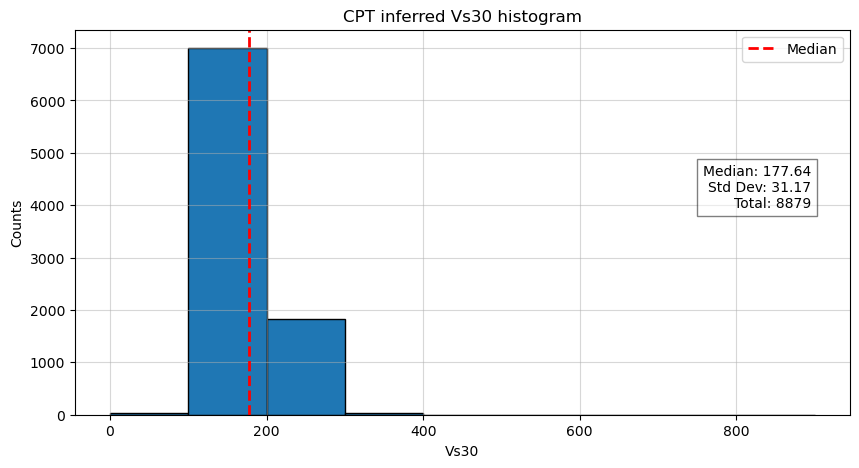

In [28]:
bin_intervals = range(0, 1000, 100)
plt.figure(figsize=(10, 5))
counts, bins, patches = plt.hist(filtered_df['Vs30'], bins=bin_intervals, edgecolor='black')
plt.title('CPT inferred Vs30 histogram')
plt.xlabel('Vs30')
plt.ylabel('Counts')
plt.grid(True, alpha=0.5)
std_dev = filtered_df['Vs30'].std()
med = filtered_df['Vs30'].median()
total_counts = filtered_df['Vs30'].count()
plt.text(0.95, 0.65, f'Median: {med:.2f}\nStd Dev: {std_dev:.2f}\nTotal: {total_counts}',
         transform=plt.gca().transAxes, ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.5))
plt.axvline(med, color='red', linestyle='--', linewidth=2, label='Median')
plt.legend()
plt.show()

In [29]:
# Plot histogram of GID descriptions

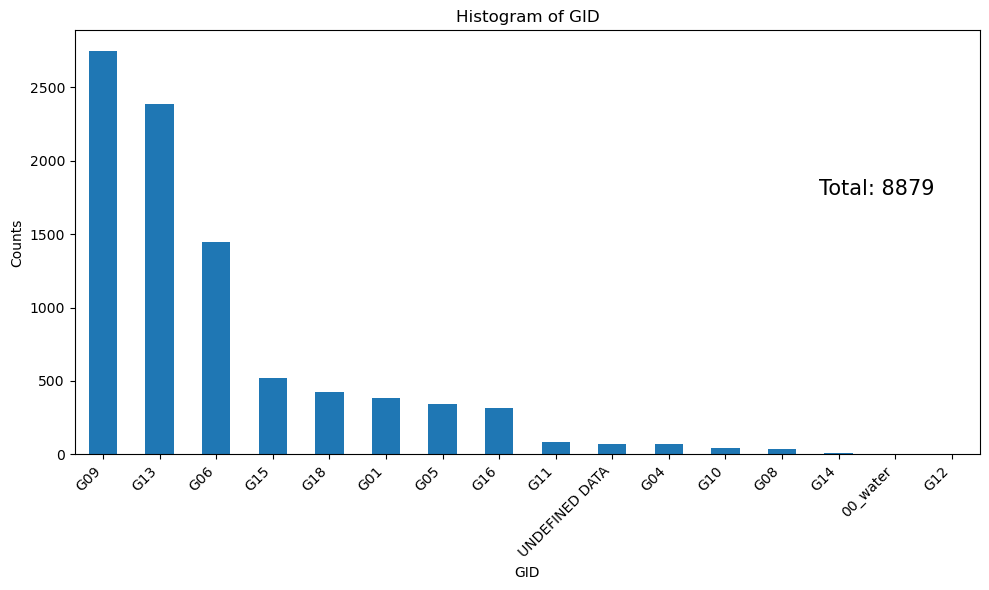

In [30]:
plt.figure(figsize=(10, 6))
filtered_df['gid_description'].value_counts().plot(kind='bar')
plt.xlabel('GID')
plt.ylabel('Counts')
total = filtered_df['gid_description'].count()
plt.text(0.95, 0.65, f'Total: {total}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=15)
plt.title('Histogram of GID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# Plot histograms of Vs30 for each GID description

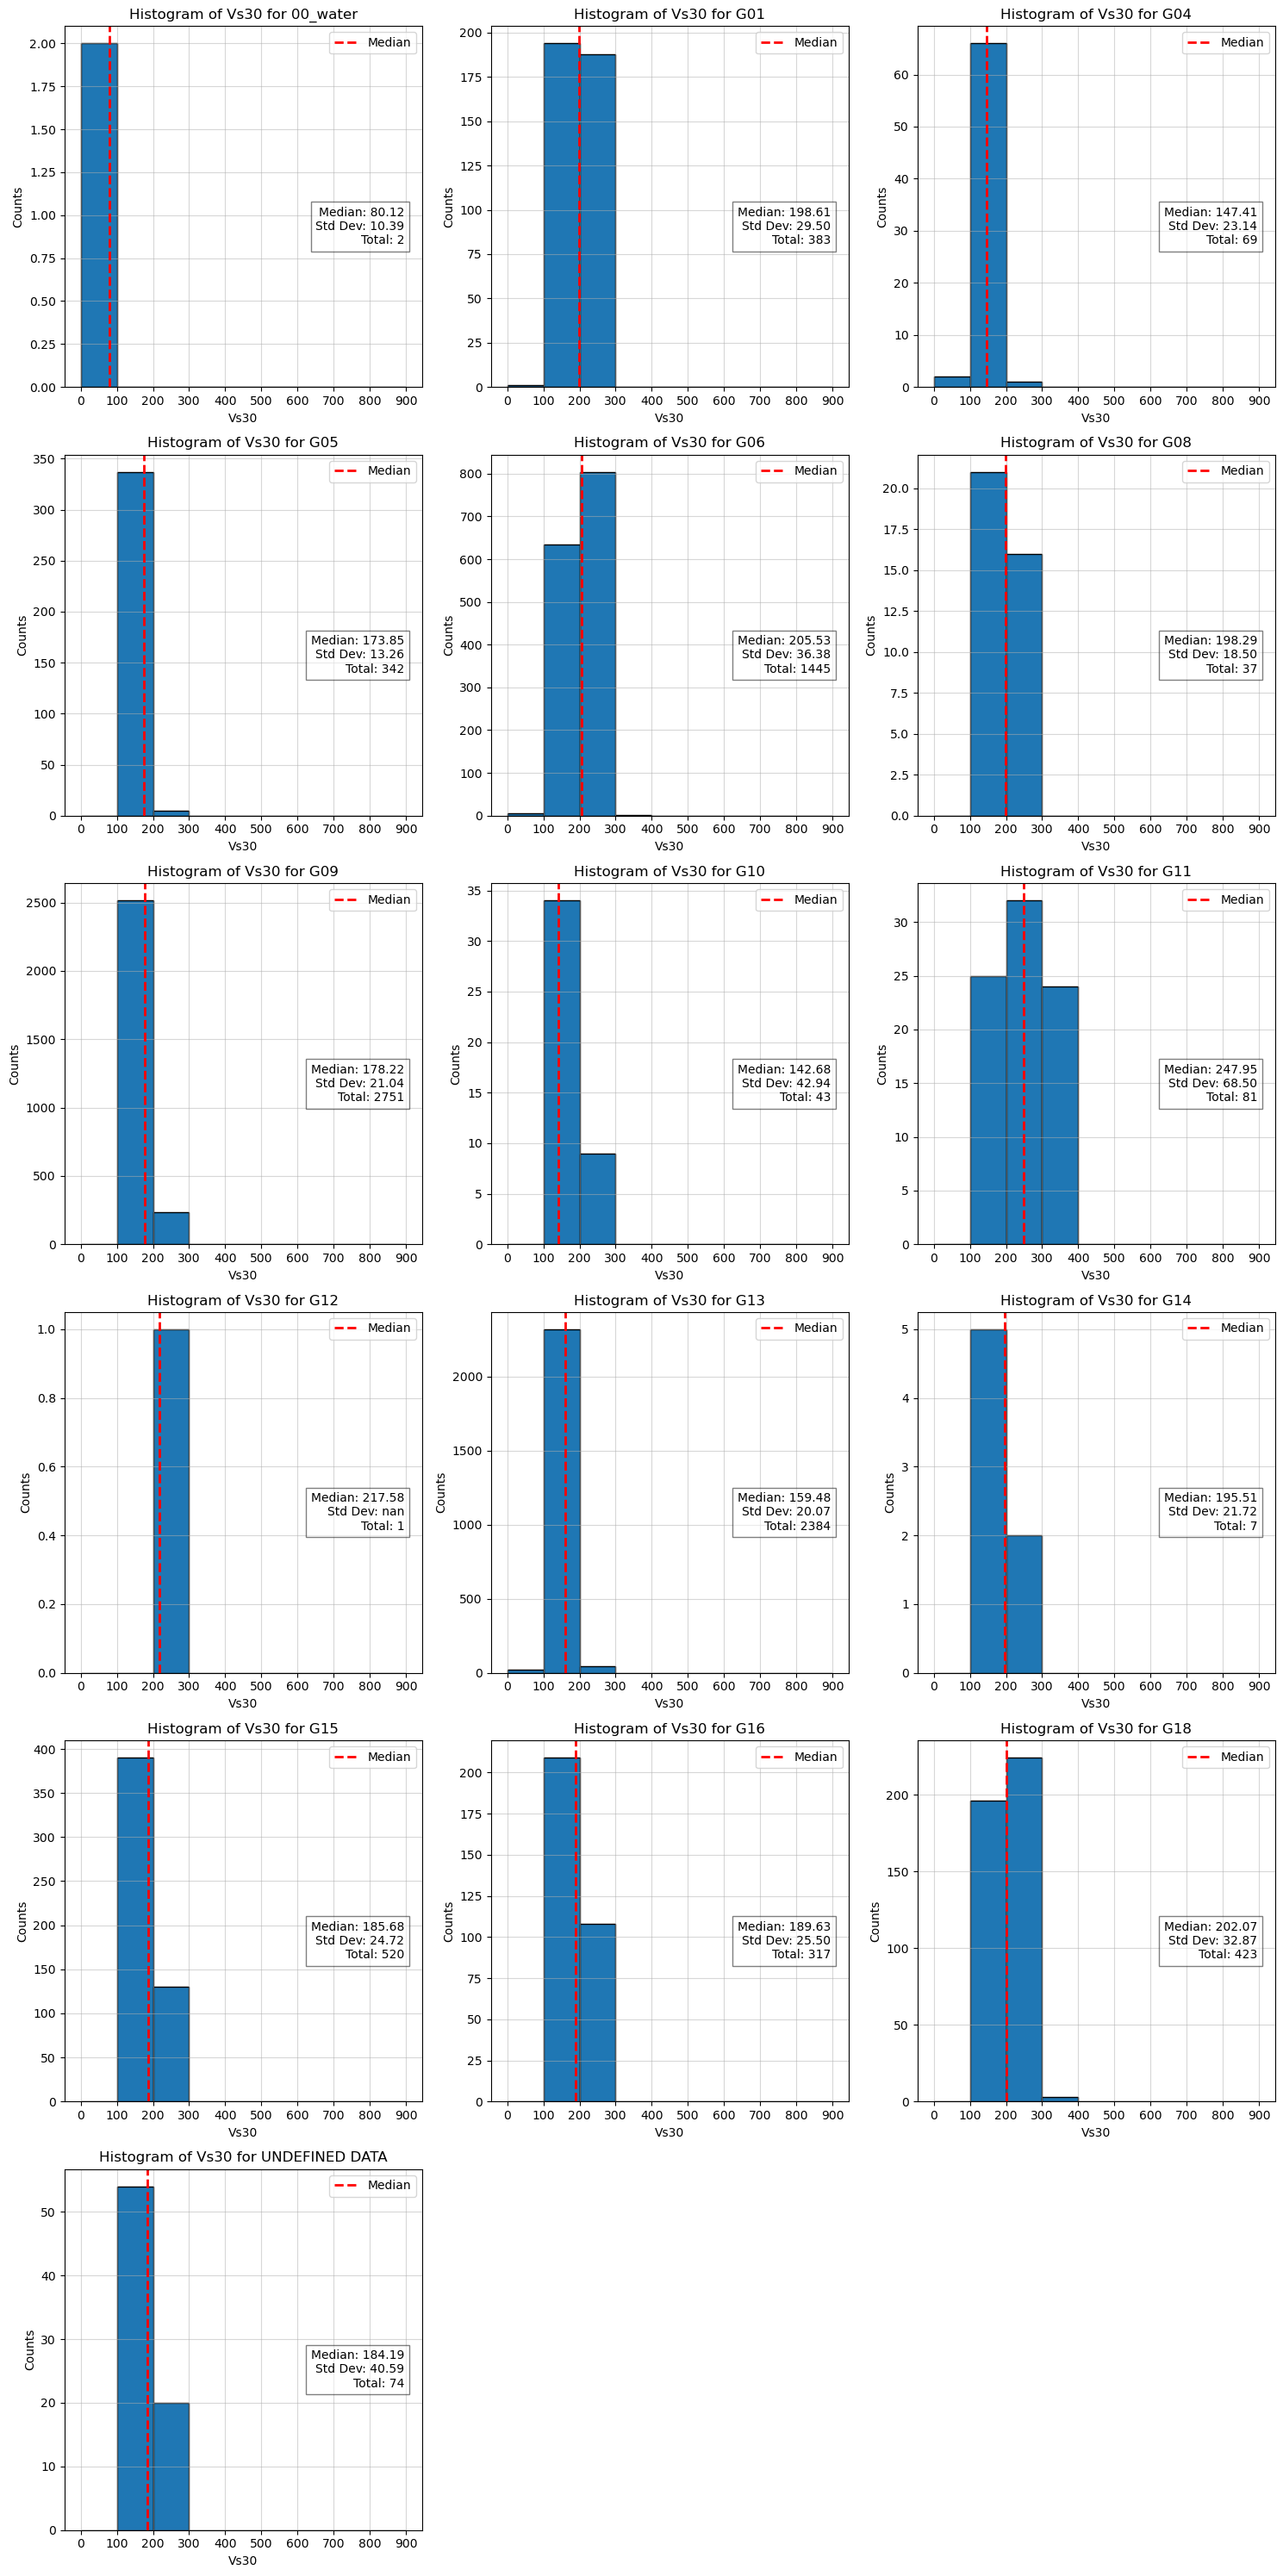

In [32]:
grouped = filtered_df.groupby('gid_description')
num_gids = len(grouped)
cols = 3
rows = int(np.ceil(num_gids / cols))
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
bin_intervals = range(0, 1000, 100)
axes = axes.flatten()
for idx, (gid, group) in enumerate(grouped):
    ax = axes[idx]
    counts, bins, patches = ax.hist(group['Vs30'], bins=bin_intervals, edgecolor='black')
    std_dev = group['Vs30'].std()
    med = group['Vs30'].median()
    total_counts = group['Vs30'].count()
    ax.text(0.95, 0.5, f'Median: {med:.2f}\nStd Dev: {std_dev:.2f}\nTotal: {total_counts}',
            transform=ax.transAxes, ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.5))
    ax.set_title(f'Histogram of Vs30 for {gid}')
    ax.set_xlabel('Vs30')
    ax.set_ylabel('Counts')
    ax.grid(True, alpha=0.5)
    ax.axvline(med, color='red', linestyle='--', linewidth=2, label='Median')
    ax.legend()
    ax.set_xticks(np.arange(0, 1000, 100))
for idx in range(num_gids, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

In [33]:
# Load measured sites data

In [34]:
geo_ids = {
    1: ("G01", "Peat"),
    2: ("G04", "Artificial fill"),
    3: ("G05", "Fluvial and estuarine deposits"),
    4: ("G06", "Alluvium and valley sediments"),
    5: ("G08", "Lacustrine"),
    6: ("G09", "Beach, bar, dune deposits"),
    7: ("G10", "Fan deposits"),
    8: ("G11", "Loess"),
    9: ("G12", "Glacigenic sediments"),
    10: ("G13", "Flood deposits"),
    11: ("G14", "Glacial moraines and till"),
    12: ("G15", "Undifferentiated sediments and sedimentary rocks"),
    13: ("G16", "Terrace deposits and old alluvium"),
    14: ("G17", "Volcanic rocks and deposits"),
    15: ("G18", "Crystalline rocks"),
}

meas_df = pd.read_csv('measured_sites.csv')
vs30_geo_id_df = meas_df.copy()
vs30_geo_id_df = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] != 255]  # remove 255 = ID_NODATA
vs30_geo_id_df = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] != 0] 
vs30_geo_id_df = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] != 4]  # remove 255 = ID_NODATA
# remove 0 = Water

In [35]:
# Add uncertainty to inferred CPT Vs30 data

In [36]:
filtered_df['uncertainty'] = 0.5
print(filtered_df)

                           Filename      NZTM_X      NZTM_Y  NZGD_Depth  \
0       CPT_10001_measurement_num_0  1570256.81  5178665.74       23.34   
2       CPT_10003_measurement_num_0  1571621.24  5179830.33       27.30   
3       CPT_10004_measurement_num_0  1571595.25  5179847.32       27.24   
4       CPT_10005_measurement_num_0  1570681.58  5180752.94       20.06   
9       CPT_10013_measurement_num_0  1573937.02  5182068.18       20.02   
...                             ...         ...         ...         ...   
29017  SCPT_57366_measurement_num_0  1572678.94  5182447.27       20.23   
29021  SCPT_92085_measurement_num_0  1884386.38  5824414.86       25.48   
29022  SCPT_94119_measurement_num_0  1797448.00  5822778.00       24.55   
29024  SCPT_94198_measurement_num_0  1875102.59  5822253.40       35.00   
29025  SCPT_94199_measurement_num_0  1875297.27  5822147.70       35.00   

       Depth    Vs30  NZGD_Rounddown_Depth  gid  tid gid_description  \
0         23  146.60       

In [37]:
# Merge measured and filtered data

In [38]:
merged_df = pd.concat([meas_df, filtered_df], ignore_index=True)
merged_df = pd.DataFrame(merged_df[['Vs30', 'gid', 'uncertainty']])
#merged_df = merged_df.merge(df_gid_mapping, on='gid', how='left')
merged_df = merged_df[merged_df['gid'] != 0]
merged_df = merged_df[merged_df['gid'] != 255]
print(merged_df)
merged_df_unique = merged_df['gid'].drop_duplicates()
print(merged_df_unique)
np.shape(merged_df)

            Vs30  gid  uncertainty
0      224.85387    6          0.2
1      205.06209    6          0.2
2      164.72166   10          0.2
3      151.65314   10          0.2
4      220.53214    6          0.2
...          ...  ...          ...
10553  175.58000   10          0.5
10554  180.31000    6          0.5
10555  206.84000    4          0.5
10556  165.01000   15          0.5
10557  187.99000   15          0.5

[10467 rows x 3 columns]
0        6
2       10
5        4
80       1
100      3
243      7
282      8
315     15
348     13
358     12
383      2
390     11
526      9
906      5
1071    14
Name: gid, dtype: int64


(10467, 3)

In [39]:
means = []
errors = []
for i,(gid,geo_name) in geo_ids.items():
    print(gid, geo_name)
    count = merged_df.loc[merged_df['gid']==i].Vs30.count()
    vs30_mean= merged_df.loc[merged_df['gid']==i].Vs30.mean()
    vs30_std = merged_df.loc[merged_df['gid']==i].Vs30.std()
    print("n = {} vs30={} std= {}".format(count, vs30_mean, vs30_std))

    means.append(vs30_mean)
    errors.append(vs30_std)



G01 Peat
n = 414 vs30=194.89669442028986 std= 30.450471577189873
G04 Artificial fill
n = 122 vs30=232.50278139344263 std= 157.06847543480643
G05 Fluvial and estuarine deposits
n = 368 vs30=174.08121307065215 std= 15.72997651020892
G06 Alluvium and valley sediments
n = 1843 vs30=230.91511817145957 std= 101.43145007195277
G08 Lacustrine
n = 40 vs30=217.29274999999998 std= 102.94058482961958
G09 Beach, bar, dune deposits
n = 2906 vs30=185.73455339298005 std= 42.61444175738373
G10 Fan deposits
n = 101 vs30=292.48181574257427 std= 193.9420796100443
G11 Loess
n = 117 vs30=295.84726273504276 std= 143.27882607667084
G12 Glacigenic sediments
n = 7 vs30=301.0828571428571 std= 100.84711890022537
G13 Flood deposits
n = 2700 vs30=165.08056617777777 std= 29.15940697771812
G14 Glacial moraines and till
n = 15 vs30=284.83866666666665 std= 90.00312715731181
G15 Undifferentiated sediments and sedimentary rocks
n = 806 vs30=359.6875314143921 std= 268.03230914867487
G16 Terrace deposits and old alluvium
n

In [40]:
prior = model_geology.model_prior()
prior_means = prior.T[0]
prior_errors = prior.T[1] * prior_means

posterior = model_geology.model_prior()
print(posterior)
posterior_means = posterior.T[0]
means_plus_1std = posterior_means * (np.exp(posterior.T[1]) - 1)
means_minus_1std = posterior_means * (1 - np.exp(-posterior.T[1]))
yerr2 = [means_minus_1std, means_plus_1std]

print(merged_df)

[[1.61e+02 5.22e-01]
 [1.98e+02 3.14e-01]
 [2.39e+02 8.67e-01]
 [3.23e+02 3.65e-01]
 [3.26e+02 1.35e-01]
 [3.39e+02 6.47e-01]
 [3.60e+02 3.38e-01]
 [3.76e+02 3.80e-01]
 [3.99e+02 3.05e-01]
 [4.48e+02 4.32e-01]
 [4.53e+02 5.12e-01]
 [4.55e+02 5.45e-01]
 [4.58e+02 7.61e-01]
 [6.35e+02 9.95e-01]
 [7.50e+02 6.41e-01]]
            Vs30  gid  uncertainty
0      224.85387    6          0.2
1      205.06209    6          0.2
2      164.72166   10          0.2
3      151.65314   10          0.2
4      220.53214    6          0.2
...          ...  ...          ...
10553  175.58000   10          0.5
10554  180.31000    6          0.5
10555  206.84000    4          0.5
10556  165.01000   15          0.5
10557  187.99000   15          0.5

[10467 rows x 3 columns]


In [53]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from vs30 import model, model_geology, sites_cluster

geo_ids = {
    1: ("G01", "Peat"),
    2: ("G04", "Artificial fill"),
    3: ("G05", "Fluvial and estuarine deposits"),
    4: ("G06", "Alluvium and valley sediments"),
    5: ("G08", "Lacustrine"),
    6: ("G09", "Beach, bar, dune deposits"),
    7: ("G10", "Fan deposits"),
    8: ("G11", "Loess"),
    9: ("G12", "Glacigenic sediments"),
    10: ("G13", "Flood deposits"),
    11: ("G14", "Glacial moraines and till"),
    12: ("G15", "Undifferentiated sediments and sedimentary rocks"),
    13: ("G16", "Terrace deposits and old alluvium"),
    14: ("G17", "Volcanic rocks and deposits"),
    15: ("G18", "Crystalline rocks"),
}

df = merged_df
print(df)

vs30_geo_id_df = df.copy()
vs30_geo_id_df = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] != 255]  # remove 255 = ID_NODATA
vs30_geo_id_df = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] != 0]  # remove 0 = Water

means = []
errors = []
for i, (gid, geo_name) in geo_ids.items():
    print(gid, geo_name)
    count = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] == i].vs30.count()
    vs30_mean = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] == i].vs30.mean()
    vs30_std = vs30_geo_id_df.loc[vs30_geo_id_df['gid'] == i].vs30.std()
    print("n = {} vs30={} std= {}".format(count, vs30_mean, vs30_std))

    means.append(vs30_mean)
    errors.append(vs30_std)

prior = model_geology.model_prior()
prior_means = prior.T[0]
prior_errors = prior.T[1] * prior_means

posterior = model_geology.model_prior()
print(posterior)
posterior_means = posterior.T[0]

means_plus_1std = posterior_means * (np.exp(posterior.T[1]) - 1)
means_minus_1std = posterior_means * (1 - np.exp(-posterior.T[1]))
yerr2 = [means_minus_1std, means_plus_1std]
print(means_plus_1std)
print(means_minus_1std)
print(yerr2)

vs30_geo_id_df = vs30_geo_id_df.rename(columns={"NZTM_X": "easting", "NZTM_Y": "northing", "vs30": "vs30"})
new_posterior = model.posterior(posterior, vs30_geo_id_df, "gid")
new_posterior_means = new_posterior.T[0]
new_posterior_errors = new_posterior.T[1] * new_posterior_means
upper_new_posterior_errors = new_posterior_errors + new_posterior_means
lower_new_posterior_errors = new_posterior_means - new_posterior_errors

# Correctly calculate the error bars
means_plus_1std2 = new_posterior_means * (np.exp(new_posterior.T[1]) - 1)
means_minus_1std2 = new_posterior_means * (1 - np.exp(-new_posterior.T[1]))
yerr = [means_minus_1std2, means_plus_1std2]

median_vs30 = np.median(new_posterior[:, 0])
print(new_posterior_means)
print(upper_new_posterior_errors)
print(lower_new_posterior_errors)

plt.figure(figsize=(7, 6))
scatter_label = 'Updated Vs30 Data'
for i, (gid, geo_name) in enumerate(geo_ids.items()):
    subset = vs30_geo_id_df[vs30_geo_id_df['gid'] == gid]
    plt.scatter([i] * len(subset), subset['vs30'], color='grey', label=scatter_label if i == 0 else None)

posterior = model_geology.model_posterior_paper()
posterior_means = posterior.T[0]
means_plus_1std = posterior_means * (np.exp(posterior.T[1]) - 1)
means_minus_1std = posterior_means * (1 - np.exp(-posterior.T[1]))
yerr2 = [means_minus_1std, means_plus_1std]
plt.errorbar(np.arange(len(posterior_means)) - 0.2, posterior_means, yerr=yerr2, fmt='o', capsize=5, label='Median ± 1 std (Foster et al. (2019))', color='blue')
print(posterior_means)

# Plot the median values for new_posterior
plt.errorbar(np.arange(len(new_posterior_means))+0.2, new_posterior_means, yerr=yerr, fmt='o', capsize=5, label='Median ± 1 std (Updated Dataset)', color='r')

posterior = model_geology.model_prior()
print(posterior)
posterior_means = posterior.T[0]

means_plus_1std = posterior_means * (np.exp(posterior.T[1]) - 1)
means_minus_1std = posterior_means * (1 - np.exp(-posterior.T[1]))
yerr2 = [means_minus_1std, means_plus_1std]
#plt.errorbar(np.arange(len(posterior_means))-0.3, posterior_means, yerr=yerr2, fmt='o', capsize=5, label='Median ± 1 std (Prior)', color='green')

#plt.title('Comparison of Mean ±1 std of vs30 grouped by gid')
plt.xlabel('gid', fontsize=13)
plt.ylabel(r'$V_{s30} [m/s]$', fontsize=13)
xtick_labels = ['G01', 'G04', 'G05', 'G06', 'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'G14', 'G15', 'G16', 'G17', 'G18']

plt.xticks(ticks=np.arange(len(new_posterior_means)), labels=xtick_labels, fontsize=13, rotation=45)  # Rotate x-ticks by 90 degrees
plt.legend()
plt.yscale('log')
plt.ylim(0,1700)
plt.yticks([200, 400, 600, 800, 1000, 1200, 1400, 1600], fontsize=13)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])
print(posterior)
print(new_posterior)
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.savefig('Updated_Gid3.png',dpi=400)
plt.show()

            vs30  gid  uncertainty
0      224.85387    6          0.2
1      205.06209    6          0.2
2      164.72166   10          0.2
3      151.65314   10          0.2
4      220.53214    6          0.2
...          ...  ...          ...
10553  175.58000   10          0.5
10554  180.31000    6          0.5
10555  206.84000    4          0.5
10556  165.01000   15          0.5
10557  187.99000   15          0.5

[10467 rows x 3 columns]
G01 Peat
n = 414 vs30=194.89669442028986 std= 30.450471577189873
G04 Artificial fill
n = 122 vs30=232.50278139344263 std= 157.06847543480643
G05 Fluvial and estuarine deposits
n = 368 vs30=174.08121307065215 std= 15.72997651020892
G06 Alluvium and valley sediments
n = 1843 vs30=230.91511817145957 std= 101.43145007195277
G08 Lacustrine
n = 40 vs30=217.29274999999998 std= 102.94058482961958
G09 Beach, bar, dune deposits
n = 2906 vs30=185.73455339298005 std= 42.61444175738373
G10 Fan deposits
n = 101 vs30=292.48181574257427 std= 193.9420796100443
G11 

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

NameError: name '_new_var' is not defined